In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

In [3]:
X, y = load_planar_dataset()
X_ts = torch.from_numpy(X.astype(np.single))
y_ts = torch.from_numpy(y.astype(np.single))
torch.set_default_dtype(torch.float32)

In [4]:
class MyModel(nn.Module):
  def __init__(self, in_feature, out_feature):
    super().__init__()
    self.linear1 = nn.Linear(in_feature, 20)
    self.linear2 = nn.Linear(20, 15)
    self.linear3 = nn.Linear(15, out_feature)

  def forward(self, X):
    X = self.linear1(X)
    X = F.tanh(X)
    X = self.linear2(X)
    X = F.tanh(X)
    X = self.linear3(X)
    X = F.sigmoid(X)
    return F.sigmoid(X)


model = MyModel(X.shape[0], y.shape[0])
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1.2)

for i in range(10000):
  y_pred = model.forward(X_ts.T)
  loss = criterion(y_pred, y_ts.T)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  if i % 1000 == 0:
            loss = loss.item()
            print(f"Iter: {i} loss: {loss:>7f}")


Iter: 0 loss: 0.717436
Iter: 1000 loss: 0.557525
Iter: 2000 loss: 0.553697
Iter: 3000 loss: 0.551888
Iter: 4000 loss: 0.550807
Iter: 5000 loss: 0.550002
Iter: 6000 loss: 0.549235
Iter: 7000 loss: 0.548570
Iter: 8000 loss: 0.548078
Iter: 9000 loss: 0.547718


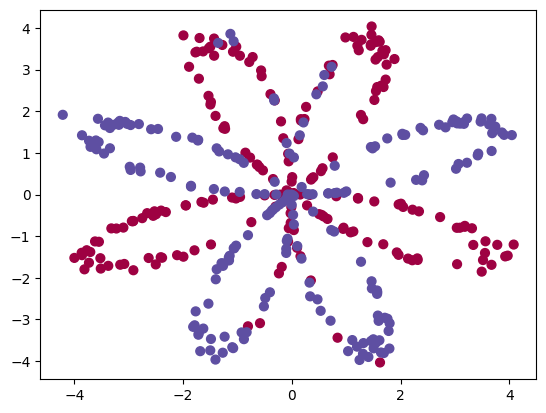

In [5]:
plt.scatter(X[0, :], X[1, :], c=y, s=40, cmap=plt.cm.Spectral)

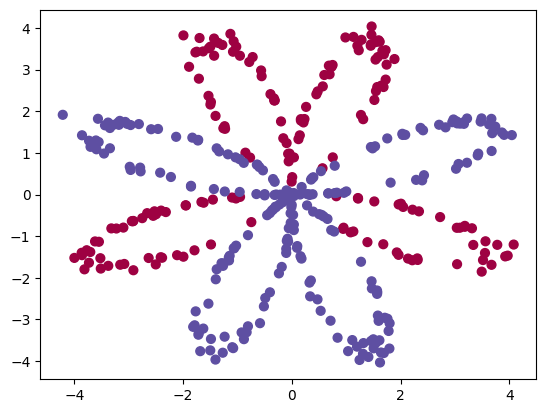

In [6]:
y_pred = model(X_ts.T).data.numpy().reshape(-1)
pred = np.where(y_pred > 0.5, True, False)

plt.scatter(X[0, :], X[1, :], c=pred, s=40, cmap=plt.cm.Spectral)